In [1]:
import numpy as np
import mdtraj as md
import os

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes\n",
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title\n",
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels\n",
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels\n",
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels\n",
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize\n",
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title"


In [3]:
cycle = list(plt.rcParams['axes.prop_cycle'].by_key().values())[0]
print(cycle)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


## Sanity check
i will make sure that the work distribution decreases in variances and becomes more negative as the number of annealing steps goes up. this is for lig0

In [4]:
work_dict = np.load('out_old_works.npz', allow_pickle=True)['arr_0'].item()

steps = [1,500]

In [5]:
complex_forward_steps = {step: np.array([i[-1] for i in work_dict['complex']['old'][step] if len(i) == step+1]) for step in steps}
solvent_forward_steps = {step: np.array([i[-1] for i in work_dict['solvent']['old'][step] if len(i) == step+1]) for step in steps}

Text(0.5, 1.0, 'complex')

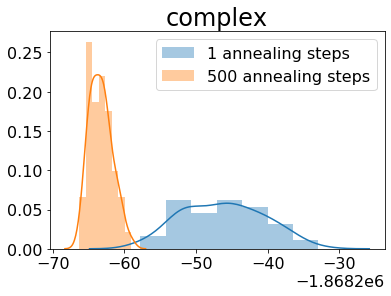

In [6]:
for step in steps:
    sns.distplot(complex_forward_steps[step], label = f"{step} annealing steps")
plt.legend()
plt.title(f"complex")

Text(0.5, 1.0, 'solvent')

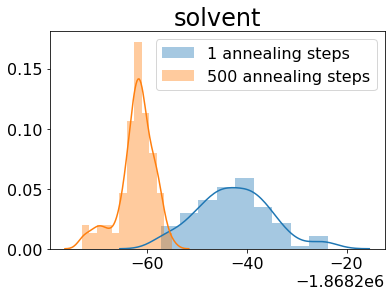

In [8]:
for step in steps:
    sns.distplot(solvent_forward_steps[step], label = f"{step} annealing steps")
plt.legend()
plt.title(f"solvent")

notice how in the solvent phase (at 500 annealing steps) there is a tail; that is not good

## aggregate all data in the forward direction

i'll now load and attempt to plot all of the aggregated data in the forward direction for all tyk2 transforms

In [9]:
full_forward_work_dict = np.load('works.forward.5000_steps.npz', allow_pickle=True)['arr_0'].item()
full_backward_work_dict = np.load('works.backward.5000_steps.npz', allow_pickle=True)['arr_0'].item()

In [10]:
print(f"forward work pairs: {full_forward_work_dict.keys()}")
print(f"backward work pairs: {full_backward_work_dict.keys()}")

forward work pairs: dict_keys([(0, 12), (0, 7), (10, 13), (10, 6), (11, 0), (11, 14), (14, 2), (14, 8), (14, 9), (15, 14), (15, 4), (1, 13), (1, 6), (2, 7), (3, 0), (3, 13), (4, 12), (4, 13), (4, 14), (4, 5), (4, 9), (5, 0), (6, 0), (8, 0)])
backward work pairs: dict_keys([(0, 12), (0, 7), (10, 13), (10, 6), (11, 0), (11, 14), (14, 2), (14, 8), (14, 9), (15, 14), (15, 4), (1, 13), (1, 6), (2, 7), (3, 0), (3, 13), (4, 12), (4, 13), (4, 14), (4, 5), (4, 9), (5, 0), (6, 0), (8, 0)])


i'll just plot one of the complex/solvent transforms together as a sanity check

In [11]:
type(full_forward_work_dict[(0,12)]['complex']['old'][5000])

dict

In [12]:
#full_work_dict[(0,12)]['complex']['old'][5000]

In [13]:
complex_forward_steps[5000] = np.array([i[-1] for i in full_forward_work_dict[(0,12)]['complex']['old'][5000].values()])
solvent_forward_steps[5000] = np.array([i[-1] for i in full_forward_work_dict[(0,12)]['solvent']['old'][5000].values()])

complex_backward_steps, solvent_backward_steps = {}, {}


complex_backward_steps[5000] = np.array([i[-1] for i in full_backward_work_dict[(0,12)]['complex']['old'][5000].values()])
solvent_backward_steps[5000] = np.array([i[-1] for i in full_backward_work_dict[(0,12)]['solvent']['old'][5000].values()])

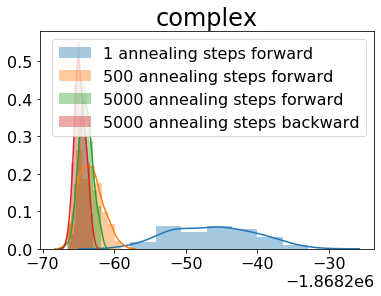

In [14]:
for step in [1,500, 5000]:
    sns.distplot(complex_forward_steps[step], label = f"{step} annealing steps forward")

plt.title(f"complex")

sns.distplot(-complex_backward_steps[5000], label = f"{step} annealing steps backward")
plt.legend()

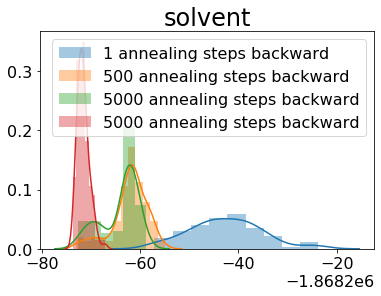

In [15]:
for step in [1, 500, 5000]:
    sns.distplot(solvent_forward_steps[step], label = f"{step} annealing steps backward")
    
plt.title(f"solvent")
sns.distplot(-solvent_backward_steps[5000], label = f"{step} annealing steps backward")
plt.legend()

so this begs the question...did backward annealing work? <br>
maybe i can plot _just_ the 5000 annealing steps for complex and solvent and compute a BAR free energy and compare it to EXP

In [16]:
from pymbar import BAR
from pymbar import EXP

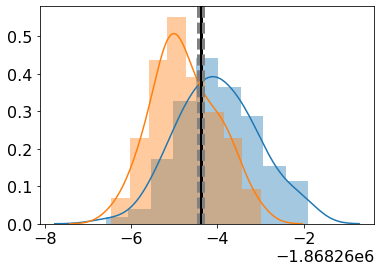

In [17]:
sns.distplot(complex_forward_steps[5000], label = f"forward annealing complex")
sns.distplot(-complex_backward_steps[5000], label = f"negative backward annealing complex")
dg, ddg = BAR(complex_forward_steps[5000], complex_backward_steps[5000])
plt.axvline(dg, color='k', lw = 3)
plt.axvline(dg-ddg, color='gray', lw=3, ls='--')
plt.axvline(dg+ddg, color='gray', lw=3, ls='--')


In [18]:
from pymbar import BAR
from pymbar import EXP

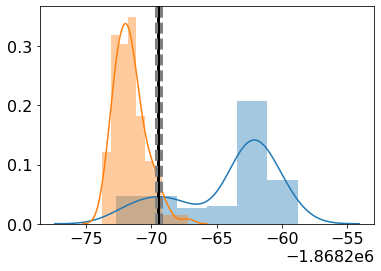

In [19]:
sns.distplot(solvent_forward_steps[5000], label = f"forward annealing solvent")
sns.distplot(-solvent_backward_steps[5000], label = f"negative backward annealing solvent")
exp_dg_forward, exp_ddg_forward = EXP(solvent_forward_steps[5000])
exp_dg_backward, exp_ddg_backward = EXP(solvent_backward_steps[5000])
dg, ddg = BAR(solvent_forward_steps[5000], solvent_backward_steps[5000])

#BAR
plt.axvline(dg, color='k', lw = 3)
plt.axvline(dg-ddg, color='gray', lw=3, ls='--')
plt.axvline(dg+ddg, color='gray', lw=3, ls='--')

# #EXP
# plt.axvline(exp_dg_forward, color='gray', lw = 3)
# plt.axvline(exp_dg_forward - exp_ddg_forward, color='gray', lw=3, ls='-.')
# plt.axvline(exp_dg_forward + exp_ddg_forward, color='gray', lw=3, ls='-.')
# plt.axvline(-exp_dg_backward, color='gray', lw=3)
# plt.axvline(-exp_dg_backward - exp_ddg_backward, color='gray', lw=3, ls='-.')
# plt.axvline(-exp_dg_backward + exp_ddg_backward, color='gray', lw=3, ls='-.')

In [95]:
assert list(full_forward_work_dict.keys()) == list(full_backward_work_dict.keys())
import itertools
_list = list(itertools.chain(*list(full_forward_work_dict.keys())))
indices = list(set(_list))
forward_aggregation_dictionary = {index: {'solvent': [], 'complex': []} for index in indices}
backward_aggregation_dictionary = {index: {'solvent': [], 'complex': []} for index in indices}
print(len(indices))

16


plot all of the work distributions separately

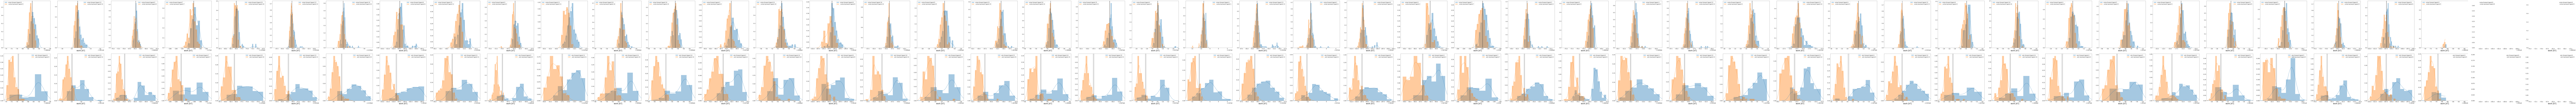

In [97]:
fig = plt.figure(figsize=(480, 20))
rows = 2
cols = 48
axes = fig.subplots(nrows=rows, ncols=cols)
for _idx, key in enumerate(list(full_forward_work_dict.keys())):
    plot_idx = _idx * 2
    #_dict = full_work_dict[key]
    xlims_low = []; xlims_high = []
    
    forward_complex_old = np.array([y[-1] for y in full_forward_work_dict[key]['complex']['old'][5000].values()])
    forward_complex_new = np.array([y[-1] for y in full_forward_work_dict[key]['complex']['new'][5000].values()])
    forward_solvent_old = np.array([y[-1]  for y in full_forward_work_dict[key]['solvent']['old'][5000].values()])
    forward_solvent_new = np.array([y[-1] for y in full_forward_work_dict[key]['solvent']['new'][5000].values()])
    
        
    backward_complex_old = np.array([y[-1] for y in full_backward_work_dict[key]['complex']['old'][5000].values()])
    backward_complex_new = np.array([y[-1] for y in full_backward_work_dict[key]['complex']['new'][5000].values()])
    backward_solvent_old = np.array([y[-1]  for y in full_backward_work_dict[key]['solvent']['old'][5000].values()])
    backward_solvent_new = np.array([y[-1] for y in full_backward_work_dict[key]['solvent']['new'][5000].values()])
    
    forward_aggregation_dictionary[key[0]]['complex'].append(forward_complex_old)
    forward_aggregation_dictionary[key[0]]['solvent'].append(forward_solvent_old)
    forward_aggregation_dictionary[key[1]]['complex'].append(forward_complex_new)
    forward_aggregation_dictionary[key[1]]['solvent'].append(forward_solvent_new)
    
    backward_aggregation_dictionary[key[0]]['complex'].append(backward_complex_old)
    backward_aggregation_dictionary[key[0]]['solvent'].append(backward_solvent_old)
    backward_aggregation_dictionary[key[1]]['complex'].append(backward_complex_new)
    backward_aggregation_dictionary[key[1]]['solvent'].append(backward_solvent_new)
    
    
    

    
    xlim_low_old = min([min(forward_complex_old), min(forward_solvent_old), min(-backward_complex_old), min(-backward_solvent_old)])
    xlim_high_old = max([max(forward_complex_old), max(forward_solvent_old), max(-backward_complex_old), max(-backward_solvent_old)])
    
    xlim_low_new = min([min(forward_complex_new), min(forward_solvent_new), min(-backward_complex_new), min(-backward_solvent_new)])
    xlim_high_new = max([max(forward_complex_new), max(forward_solvent_new), max(-backward_complex_new), max(-backward_solvent_new)])
    
    #compute BAR free energies
    dg_comp_old, ddg_comp_old = BAR(forward_complex_old, backward_complex_old)
    dg_solv_old, ddg_solv_old = BAR(forward_solvent_old, backward_solvent_old)
    dg_comp_new, ddg_comp_new = BAR(forward_complex_new, backward_complex_new)
    dg_solv_new, ddg_solv_new = BAR(forward_solvent_new, backward_solvent_new)
    
    
            
    
    #col i, row 0: old complex
    _axis = axes[0, plot_idx]
    try:
        
        label = f"ligand {key[0]}"
        sns.distplot(forward_complex_old, ax = _axis, label = f"comp forward " + label)
        sns.distplot(-backward_complex_old, ax = _axis, label = f"-comp backward "+label)
        _axis.axvline(dg_comp_old, color='k')
        _axis.axvline(dg_comp_old + ddg_comp_old, color = 'gray', ls = '--')
        _axis.axvline(dg_comp_old - ddg_comp_old, color = 'gray', ls = '--')
        _axis.set_xlim(xlim_low_old - 1, xlim_high_old + 1)
        _axis.legend()
    except Exception as e:
        print(e)
        pass
    
    #col i, row 1: old solvent
    _axis = axes[1, plot_idx]
    try:
        label = f"ligand {key[0]}"
        sns.distplot(forward_solvent_old, ax = _axis, label = f"solv forward "+ label)
        sns.distplot(-backward_solvent_old, ax = _axis, label = f"-solv backward "+ label)
        _axis.axvline(dg_solv_old, color = 'k')
        _axis.axvline(dg_solv_old + ddg_solv_old, color = 'gray', ls = '--')
        _axis.axvline(dg_solv_old - ddg_solv_old, color = 'gray', ls = '--')
        
        _axis.set_xlim(xlim_low_old - 1, xlim_high_old + 1)
        _axis.legend()
    except Exception as e:
        print(e)
    
    #col i+1, row 0: new complex
    _axis = axes[0, plot_idx+1]
    try:
        
        label = f"ligand {key[1]}"
        sns.distplot(forward_complex_new, ax = _axis, label = f"comp forward " + label)
        sns.distplot(-backward_complex_new, ax = _axis, label = f"-comp backward "+label)
        plt.xlabel(f"work [kT]")
        _axis.axvline(dg_comp_new, color = 'k')
        _axis.axvline(dg_comp_new + ddg_comp_new, color = 'gray', ls = '--')
        _axis.axvline(dg_comp_new - ddg_comp_new, color = 'gray', ls = '--')
        _axis.set_xlim(xlim_low_new - 1, xlim_high_new + 1)
        _axis.legend()
        _axis.set_xlabel(f"work [kT]")
    except Exception as e:
        print(e)
        pass
    
    #col i+1, row 1: new solvent
    _axis = axes[1, plot_idx+1]
    try:
        label = f"ligand {key[1]}"
        sns.distplot(forward_solvent_new, ax = _axis, label = f"solv forward "+ label)
        sns.distplot(-backward_solvent_new, ax = _axis, label = f"-solv backward "+ label)
        _axis.set_xlim(xlim_low_new - 1, xlim_high_new + 1)
        plt.xlabel(f"work [kT]")
        _axis.axvline(dg_solv_new, color = 'k')
        _axis.axvline(dg_solv_new + ddg_solv_new, color = 'gray', ls = '--')
        _axis.axvline(dg_solv_new - ddg_solv_new, color = 'gray', ls = '--')
        _axis.legend()
        _axis.set_xlabel(f"work [kT]")
    except Exception as e:
        print(e)

plt.tight_layout()
plt.savefig(f"all_distributions.png")

now, i am going to take all of the repeats and plot their forward/backward distributions atop each other to see if there is a consistent overlap

In [100]:
np.savez(f"aggregation_dictionaries.npz", forward_aggregation_dictionary, backward_aggregation_dictionary)

plot the inconsistency between redundant distributions

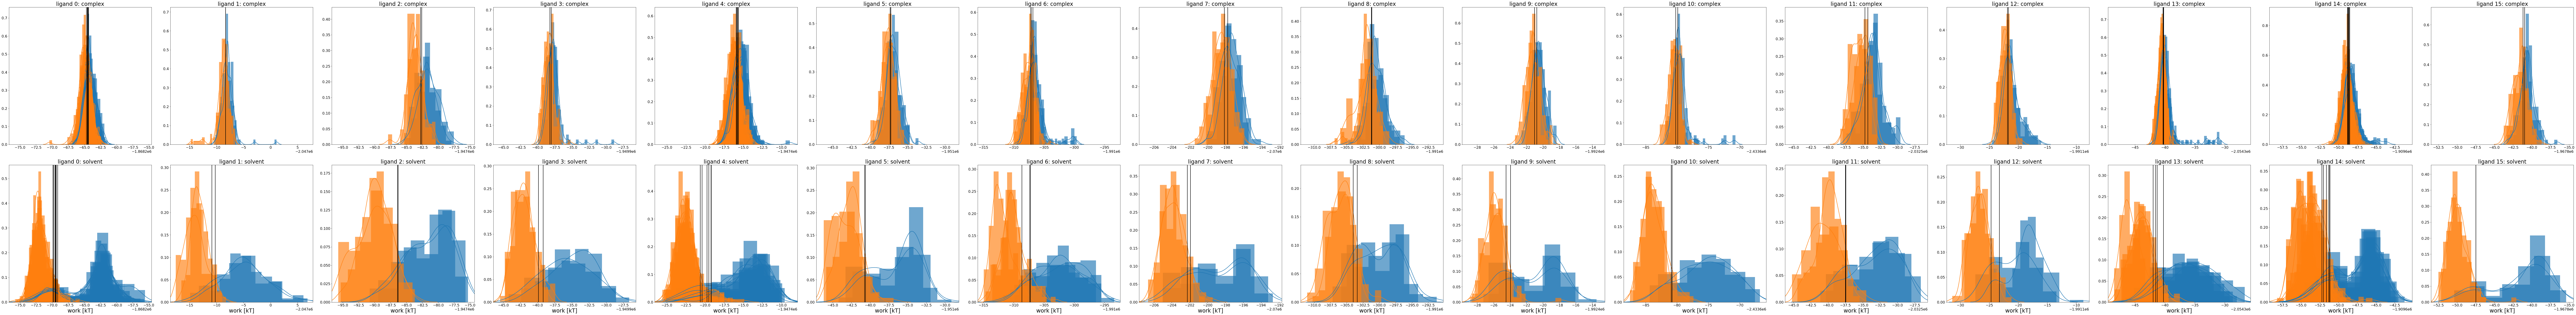

In [121]:
fig = plt.figure(figsize=(160, 20))
rows = 2
cols = 16
axes = fig.subplots(nrows=rows, ncols=cols)
for idx, key in enumerate(forward_aggregation_dictionary.keys()):
    _complex_forwards = forward_aggregation_dictionary[key]['complex']
    _complex_backwards = backward_aggregation_dictionary[key]['complex']
    
    _solvent_forwards = forward_aggregation_dictionary[key]['solvent']
    _solvent_backwards = backward_aggregation_dictionary[key]['solvent'] 
    
    _min_forward_complexes, _max_forward_complexes = min([np.min(entry) for entry in _complex_forwards]), max([np.max(entry) for entry in _complex_forwards])
    _min_backward_complexes, _max_backward_complexes = min([np.min(-entry) for entry in _complex_backwards]), max([np.max(-entry) for entry in _complex_backwards])
    
    _min_forward_solvents, _max_forward_solvents = min([np.min(entry) for entry in _solvent_forwards]), max([np.max(entry) for entry in _solvent_forwards])
    _min_backward_solvents, _max_backward_solvents = min([np.min(-entry) for entry in _solvent_backwards]), max([np.max(-entry) for entry in _solvent_backwards])
    
    abs_mins = min([_min_forward_complexes, _min_backward_complexes, _min_forward_solvents, _min_backward_solvents])
    abs_maxs = max([_max_forward_complexes, _max_backward_complexes, _max_forward_solvents, _max_backward_solvents])
    
    #complexes at row 0
    _axis = axes[0, idx]
    _axis.set_title(f"ligand {key}: complex")
    for entry in _complex_forwards:
        sns.distplot(entry, color = cycle[0], ax = _axis)
    for entry in _complex_backwards:
        sns.distplot(-entry, color = cycle[1], ax = _axis)
    
    BAR_estimates = [BAR(_forward, _backward)[0] for _forward, _backward in zip(_complex_forwards, _complex_backwards)]
    for entry in BAR_estimates:
        _axis.axvline(entry, color = 'k')
    _axis.set_xlim(abs_mins - 1, abs_maxs + 1)
    
    #solvents at row 1
    _axis = axes[1, idx]
    _axis.set_title(f"ligand {key}: solvent")
    for entry in _solvent_forwards:
        sns.distplot(entry, color = cycle[0], ax = _axis)
    for entry in _solvent_backwards:
        sns.distplot(-entry, color = cycle[1], ax = _axis)
    
    BAR_estimates = [BAR(_forward, _backward)[0] for _forward, _backward in zip(_solvent_forwards, _solvent_backwards)]
    for entry in BAR_estimates:
        _axis.axvline(entry, color = 'k')
    _axis.set_xlim(abs_mins - 1, abs_maxs + 1)
    _axis.set_xlabel(f"work [kT]")
    
plt.tight_layout()
plt.savefig(f"overlapped_aggregate_distributions.png")

now i can aggregate all of the distributions

In [128]:
ligand_BAR_estimates = {}

plot the aggregated distributions

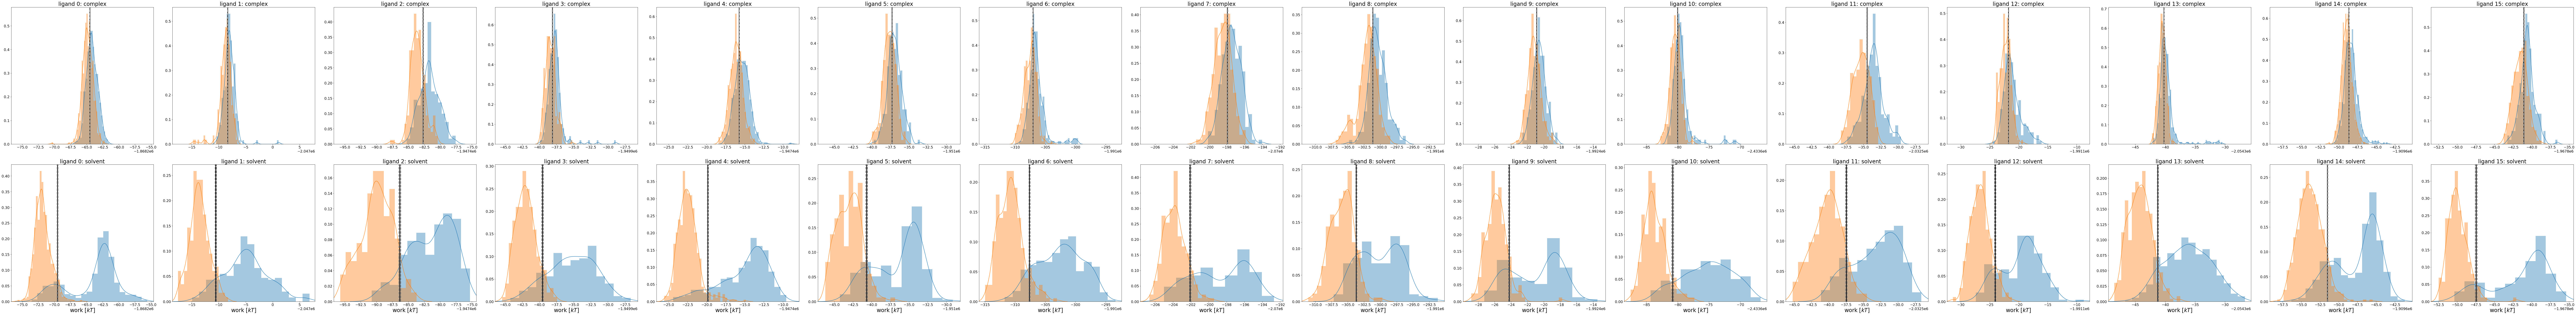

In [129]:
fig = plt.figure(figsize=(160, 20))
rows = 2
cols = 16
axes = fig.subplots(nrows=rows, ncols=cols)

for idx, key in enumerate(forward_aggregation_dictionary.keys()):
    _complex_forwards = forward_aggregation_dictionary[key]['complex']
    _complex_backwards = backward_aggregation_dictionary[key]['complex']
    
    _solvent_forwards = forward_aggregation_dictionary[key]['solvent']
    _solvent_backwards = backward_aggregation_dictionary[key]['solvent']
    
    all_complex_forwards = np.concatenate(_complex_forwards)
    all_complex_backwards = np.concatenate(_complex_backwards)
    all_solvent_forwards = np.concatenate(_solvent_forwards)
    all_solvent_backwards = np.concatenate(_solvent_backwards)
    
    abs_min = min([np.min(all_complex_forwards), np.min(-all_complex_backwards), np.min(all_solvent_forwards), np.min(-all_solvent_backwards)])
    abs_max = max([np.max(all_complex_forwards), np.max(-all_complex_backwards), np.max(all_solvent_forwards), np.max(-all_solvent_backwards)])
    
    local_dict = {}
    
    
    #complexes at row 0
    _axis = axes[0, idx]
    _axis.set_title(f"ligand {key}: complex")
    sns.distplot(all_complex_forwards, color = cycle[0], ax=_axis)
    sns.distplot(-all_complex_backwards, color = cycle[1], ax = _axis)
    comp_dg, comp_ddg = BAR(all_complex_forwards, all_complex_backwards)
    _axis.axvline(comp_dg, color = 'k', lw=3)
    _axis.axvline(comp_dg - comp_ddg, color = 'gray', ls = '--', lw=3)
    _axis.axvline(comp_dg + comp_ddg, color = 'gray', ls = '--', lw=3)
    _axis.set_xlim(abs_min - 1, abs_max + 1)
    local_dict['complex'] = (comp_dg, comp_ddg)
    
    
    #solvents at row 1
    _axis = axes[1, idx]
    _axis.set_title(f"ligand {key}: solvent")
    sns.distplot(all_solvent_forwards, color = cycle[0], ax=_axis)
    sns.distplot(-all_solvent_backwards, color = cycle[1], ax = _axis)
    solv_dg, solv_ddg = BAR(all_solvent_forwards, all_solvent_backwards)
    _axis.axvline(solv_dg, color = 'k', lw=3)
    _axis.axvline(solv_dg - solv_ddg, color = 'gray', ls = '--', lw=3)
    _axis.axvline(solv_dg + solv_ddg, color = 'gray', ls = '--', lw=3)
    _axis.set_xlim(abs_min - 1, abs_max + 1)
    _axis.set_xlabel(f"work [$kT$]")
    local_dict['solvent'] = (solv_dg, solv_ddg)
    
    ligand_BAR_estimates[key] = local_dict
    
plt.tight_layout()

In [122]:
a = np.concatenate([np.array([1,2,3]), np.array([4,5,6])])

In [123]:
a

array([1, 2, 3, 4, 5, 6])

In [131]:
np.savez(f"ANI2_ligand_dg_corrections.kT.npz", ligand_BAR_estimates)

what do the free energy corrections look like?


In [136]:
ligand_BAR_estimates

{0: {'complex': (-1868264.4812079687, 0.01581314907430503),
  'solvent': (-1868269.5176142228, 0.05972935203782895)},
 1: {'complex': (-2047008.32940174, 0.0305109737603828),
  'solvent': (-2047010.5531341478, 0.12725803438640812)},
 2: {'complex': (-1947482.6761665484, 0.04922690455262967),
  'solvent': (-1947486.344570786, 0.12850028038531872)},
 3: {'complex': (-1949938.101338504, 0.026233434985715273),
  'solvent': (-1949939.5596949356, 0.10826602656009117)},
 4: {'complex': (-1947415.7473464997, 0.01798080309942683),
  'solvent': (-1947419.856707167, 0.07379053241834535)},
 5: {'complex': (-1951037.2740413803, 0.030503024857728957),
  'solvent': (-1951040.6796825828, 0.10070280867606644)},
 6: {'complex': (-1991307.0243816858, 0.02866809830110326),
  'solvent': (-1991307.6221356513, 0.10311990539868605)},
 7: {'complex': (-2070197.9112146974, 0.03619708076362445),
  'solvent': (-2070202.0760382, 0.08512963366158163)},
 8: {'complex': (-1991301.1632455871, 0.04518478971555696),
  '

compute the ani free energy corrections and errors in kcal/mol @300K

In [140]:
for key, _dict in ligand_BAR_estimates.items():
    solv, comp = _dict['solvent'][0], _dict['complex'][0]
    solv_ddg, comp_ddg = _dict['solvent'][1], _dict['complex'][1]
    #print(solv, comp)
    print(key, (comp - solv)*0.593, np.sqrt(solv_ddg**2 + comp_ddg**2)*0.593)

0 2.986588908718666 0.03663977646315734
1 1.3186733177485874 0.0776026699685437
2 2.1753637128968255 0.08160078668759016
3 0.8648053638513665 0.0660595761713285
4 2.436850875774864 0.04503815267650755
5 2.0195452331311534 0.06239614136781915
6 0.35446810155850833 0.06346921620072708
7 2.4697403370032553 0.05485581167092728
8 1.5036620116024277 0.060121798030119654
9 1.9944748595186974 0.05013346554887213
10 0.4732923875744454 0.07790981268380846
11 1.7836961786567698 0.07097954925295145
12 1.3734898740977515 0.06819583878380808
13 0.6080148447831161 0.051680322864501416
14 1.6981176220076157 0.035621591810156214
15 3.8008517268861177 0.07311020902430279
